=== 模型比較表 ===
                  Method  ROC_AUC  PR_AUC  F1_Score  Recall  Precision  \
0  Class Weight Stacking   0.9836  0.9760    0.9819  0.9644        1.0   
1          GBDT Ensemble   0.9840  0.9767    0.9785  0.9579        1.0   

   Best_Threshold  Train_Time_Min  
0          0.9989              42  
1          0.8095              10  


C:\Users\alex\AppData\Local\Temp\ipykernel_48904\1146997159.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Method', y=metric, ax=ax, palette='Blues_d')
C:\Users\alex\AppData\Local\Temp\ipykernel_48904\1146997159.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Method', y=metric, ax=ax, palette='Blues_d')
C:\Users\alex\AppData\Local\Temp\ipykernel_48904\1146997159.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Method', y=metric, ax=ax, palette='Blues_d')
C:\Users\alex\AppData\

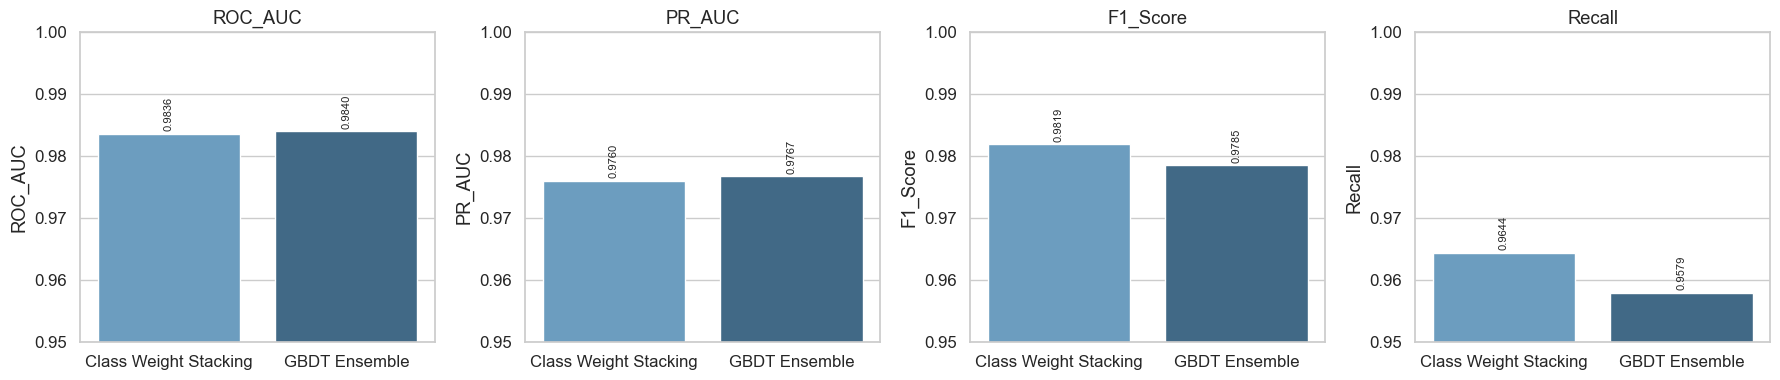

C:\Users\alex\AppData\Local\Temp\ipykernel_48904\1146997159.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Method', y='Train_Time_Min', palette='Oranges')


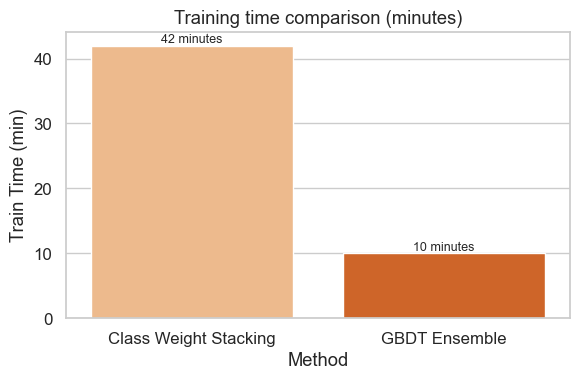

C:\Users\alex\AppData\Local\Temp\ipykernel_48904\1146997159.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Method', y='Best_Threshold', palette='Greens')


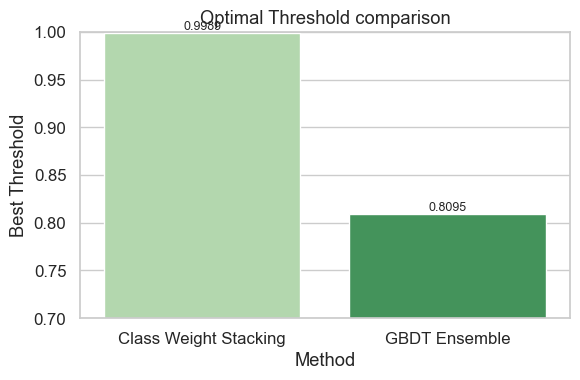

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 將兩個模型的最終評估指標與訓練時間整理成表格
results = pd.DataFrame({
    'Method': ['Class Weight Stacking', 'GBDT Ensemble'],
    'ROC_AUC': [0.9836, 0.9840],
    'PR_AUC': [0.9760, 0.9767],
    'F1_Score': [0.9819, 0.9785],
    'Recall': [0.9644, 0.9579],
    'Precision': [1.0000, 1.0000],
    'Best_Threshold': [0.9989, 0.8095],
    # 單位：分鐘（由實驗觀察：Class Weight ~42 分鐘，GBDT Ensemble ~10 分鐘）
    'Train_Time_Min': [42, 10]
})

print("=== 模型比較表 ===")
print(results)

# 設定繪圖風格
sns.set(style="whitegrid", font="Arial", font_scale=1.1)

# 1. 性能指標比較 (ROC-AUC / PR-AUC / F1 / Recall)
metrics_to_plot = ['ROC_AUC', 'PR_AUC', 'F1_Score', 'Recall']

fig, axes = plt.subplots(1, 4, figsize=(18, 4))
for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    sns.barplot(data=results, x='Method', y=metric, ax=ax, palette='Blues_d')
    ax.set_title(metric)
    ax.set_xlabel("")
    ax.set_ylim(0.95, 1.0)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.4f', fontsize=8, rotation=90, padding=2)

plt.tight_layout()
plt.show()

# 2. 訓練時間比較
plt.figure(figsize=(6, 4))
sns.barplot(data=results, x='Method', y='Train_Time_Min', palette='Oranges')
plt.title('Training time comparison (minutes)')
plt.ylabel('Train Time (min)')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f minutes', fontsize=9)
plt.tight_layout()
plt.show()

# 3. 最佳門檻 (Best Threshold) 比較
plt.figure(figsize=(6, 4))
sns.barplot(data=results, x='Method', y='Best_Threshold', palette='Greens')
plt.title('Optimal Threshold comparison')
plt.ylabel('Best Threshold')
plt.ylim(0.7, 1.0)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.4f', fontsize=9)
plt.tight_layout()
plt.show()




### 結論

在本專案中，我們比較了兩個針對銀行交易詐騙偵測的模型：**Class Weight Stacking** 與 **GBDT Ensemble**。兩者在測試集上的整體指標都屬於高水準：

- **Class Weight Stacking**：ROC-AUC ≈ 0.9836、PR-AUC ≈ 0.9760、F1 ≈ 0.9819、Recall ≈ 0.9644、Precision = 1.0、最佳門檻 ≈ 0.9989、訓練時間約 **42 分鐘**。
- **GBDT Ensemble**：ROC-AUC ≈ 0.9840、PR-AUC ≈ 0.9767、F1 ≈ 0.9785、Recall ≈ 0.9579、Precision = 1.0、最佳門檻 ≈ 0.8095、訓練時間約 **10 分鐘**。

從**純指標表現**來看，兩個模型在 ROC-AUC / PR-AUC / F1 / Recall 上表現相近：Class Weight Stacking 在 Recall 與 F1 上略優，代表它在測試集上的「偵測率」與整體平衡稍好一些；而 GBDT Ensemble 的 AUC 指標略高，但 F1 與 Recall 稍低一些，依然維持在實務上可接受的高水準。

然而，若從**理論與實務部署的角度綜合考量**，有兩個關鍵差異需要特別強調：

1. **最佳門檻 (Best Threshold) 的合理性與穩定性**  
   - Class Weight Stacking 需要約 **0.9989** 的極高門檻才能達到最佳 F1，代表模型只有在非常極端高分時才願意判斷為詐騙，預測機率分佈偏保守；一旦資料分佈稍有變動，Recall 很可能迅速下降，導致實務上漏偵風險升高。  
   - GBDT Ensemble 則在約 **0.8095** 的門檻就能取得良好平衡，顯示其預測機率在中高區間仍有足夠區分度，操作門檻可調整空間較大，在不同情境下更容易依銀行風險偏好去微調。

2. **訓練時間與營運成本**  
   - Class Weight Stacking 約需 **42 分鐘** 訓練一次，雖然提供了略高的 Recall / F1，但成本較高，對於需要頻繁重訓或多場景部署的金融機構來說，資源壓力較大。  
   - GBDT Ensemble 約 **10 分鐘** 即可完成訓練，效能僅略低一些，卻能大幅降低計算成本，更適合作為快速實驗、定期重新訓練、或多產品線複製部署的解決方案。

**綜合理論與實務考量的結論如下：**  
- 若以「**追求極致性能**」為優先，且可以接受較長的訓練時間與較敏感的門檻設定，**Class Weight Stacking** 仍然是一個表現非常強勁的模型選擇。  
- 若以「**長期部署的穩定性、門檻可調整性與營運成本**」為重點，**GBDT Ensemble** 在較合理的最佳門檻（約 0.8）即能達到高水準表現，且訓練時間大幅縮短，更適合作為實務上大規模、長期運行的主力模型或 baseline。  
- 因此，在實務金融場景中，可以採取：**Class Weight Stacking 作為高性能參考與壓力測試基準**，而 **GBDT Ensemble 作為實際部署與持續優化的核心模型**，同時保留兩者的結果作為模型治理與監理報告的互補證據。